# Problem Statement

The objective of this study is to classify the handwritten digit which are categorized into 10 classes i.e 0-9

### Import Libraries

In [138]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import seaborn as sns

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read the csv file and basic data exploration

In [3]:
df = pd.read_csv('./data/mnist_784.csv')

In [4]:
df.shape

(70000, 785)

In [5]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [10]:
df['class'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=int64)

In [17]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Testing the data

In [89]:
train, test = train_test_split(df, test_size=0.1)
test.shape

(7000, 785)

In [90]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [91]:
num_train = len(train)
num_val = len(validation)
batch_size = 32
num_epoch = 50

In [79]:
xtrain=np.asarray(train.iloc[:,:-1])

xtrain=xtrain.reshape(num_train,28, 28,1)

ytrain=np.asarray(train.iloc[:,-1:])

In [119]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

model_info = model.fit(xtrain, ytrain, batch_size = 32, epochs = 100,  validation_split=0.11, shuffle=True,)
model.save_weights('./model.h5')

Train on 49840 samples, validate on 6160 samples
Epoch 1/100
49840/49840 [==============================] - 118s 2ms/sample - loss: 0.1731 - accuracy: 0.9478 - val_loss: 0.0772 - val_accuracy: 0.9756
Epoch 2/100
49840/49840 [==============================] - 99s 2ms/sample - loss: 0.1196 - accuracy: 0.9645 - val_loss: 0.0575 - val_accuracy: 0.9828
Epoch 3/100
49840/49840 [==============================] - 93s 2ms/sample - loss: 0.0919 - accuracy: 0.9728 - val_loss: 0.0546 - val_accuracy: 0.9846
Epoch 4/100
49840/49840 [==============================] - 95s 2ms/sample - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0484 - val_accuracy: 0.9859
Epoch 5/100
49840/49840 [==============================] - 98s 2ms/sample - loss: 0.0625 - accuracy: 0.9816 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 6/100
49840/49840 [==============================] - 96s 2ms/sample - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0360 - val_accuracy: 0.9890
Epoch 7/100
49840/49840 [=========================

Epoch 55/100
49840/49840 [==============================] - 105s 2ms/sample - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0300 - val_accuracy: 0.9938
Epoch 56/100
49840/49840 [==============================] - 104s 2ms/sample - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.0323 - val_accuracy: 0.9930
Epoch 57/100
49840/49840 [==============================] - 105s 2ms/sample - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0319 - val_accuracy: 0.9930
Epoch 58/100
49840/49840 [==============================] - 104s 2ms/sample - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0321 - val_accuracy: 0.9940
Epoch 59/100
49840/49840 [==============================] - 105s 2ms/sample - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 60/100
49840/49840 [==============================] - 105s 2ms/sample - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0282 - val_accuracy: 0.9943
Epoch 61/100
49840/49840 [==============================] - 105s 2ms/sample - loss: 0.00

### Plottinng the validation Data

C:\Users\SHIVAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
C:\Users\SHIVAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


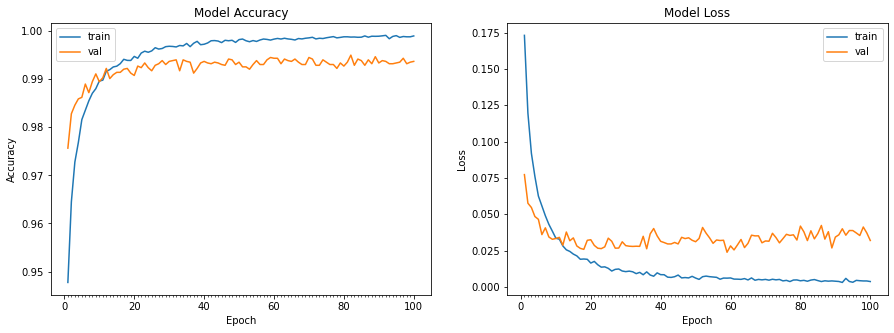

In [137]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(range(1,len(model_info.history['accuracy'])+1),model_info.history['accuracy'])
axs[0].plot(range(1,len(model_info.history['val_accuracy'])+1),model_info.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(model_info.history['accuracy'])+1),len(model_info.history['accuracy'])/10)
axs[0].legend(['train', 'val'], loc='best')

    
axs[1].plot(range(1,len(model_info.history['loss'])+1),model_info.history['loss'])
axs[1].plot(range(1,len(model_info.history['val_loss'])+1),model_info.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(model_info.history['loss'])+1),len(model_info.history['loss'])/10)
axs[1].legend(['train', 'val'], loc='best')
    
fig.savefig('./plot.png')
plt.show();

### Predicting the test Data

In [121]:
xtest=np.asarray(test.iloc[:,:-1])
num_test= len(test)
xtest=xtest.reshape(num_test,28, 28,1)

ytest=np.asarray(test.iloc[:,-1:])

7000

In [122]:
model.load_weights('./model.h5')


predict = model.predict(xtest)


print(predict.shape);

In [124]:
prediction=[]
for i in range(len(predict)):
    prediction.append(int(np.argmax(predict[i])));  

### Plotting Confusion Matrix and Accuracy

In [134]:
unique_label = np.unique([prediction])
cm = pd.DataFrame(
    confusion_matrix(ytest, prediction, labels=unique_label), 
    index=['{:}'.format(x) for x in unique_label], 
    columns=['{:}'.format(x) for x in unique_label]
)
print(cm)

     0    1    2    3    4    5    6    7    8    9
0  710    0    0    0    0    0    0    0    0    0
1    0  798    0    0    2    0    0    2    0    0
2    0    0  687    0    1    0    0    0    0    0
3    0    0    2  706    0    2    0    0    1    0
4    0    0    0    0  680    0    0    1    0    0
5    0    0    0    1    0  618    1    0    0    0
6    0    0    0    0    0    0  675    0    0    0
7    0    0    1    0    0    0    0  738    0    1
8    1    0    0    0    0    0    0    0  683    0
9    1    0    0    0    0    0    0    0    0  688


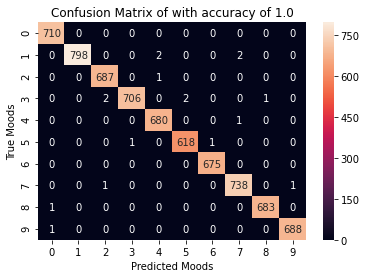

In [135]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted Moods');ax.set_ylabel('True Moods'); 
ax.set_title('Confusion Matrix of with accuracy of %s' %
                 (str(round(accuracy_score(prediction, ytest),2))))
ax.xaxis.set_ticklabels(['{:}'.format(x) for x in unique_label]); ax.yaxis.set_ticklabels(['{:}'.format(x) for x in unique_label]);
plt.savefig('./confusion-matrix.png')

In [136]:
print(accuracy_score(prediction,ytest))

0.9975714285714286


# THE  END